In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('/content/data_final preprocessed_cdms.csv')
data

,cat__Varicella_1,cat__Varicella_2,cat__Mono or polysymptomatic_2,cat__Oligoclonal bands_0,cat__Oligoclonal bands_1,cat__Oligoclonal bands_2,cat__initial EDSS_1.0,cat__initial EDSS_2.0,cat__initial symptom_1.0,cat__initial symptom_2.0,...,cat__initial symptom_nan,cat__ final EDSS_1.0,cat__ final EDSS_2.0,remainder__Gender,remainder__LLSSEP,remainder__VEP,remainder__BAEP,remainder__Periventricular MRI,remainder__Infratentorial MRI,remainder__group
0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,1,1,0,0,0,0,1
1,0,1,1,0,1,0,0,1,0,0,...,0,0,1,1,1,1,0,0,0,1
2,1,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,1,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
268,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
269,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
270,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,1,1,0,1,1,0


In [3]:
x=data.drop('remainder__group',axis=1)
y=data['remainder__group']

In [4]:
x.shape

(272, 27)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [6]:
x_train.shape

(217, 27)

In [7]:
# !pip install --upgrade imbalanced-learn
from imblearn.over_sampling import BorderlineSMOTE
Borderline = BorderlineSMOTE(random_state=42)

x_train_res, y_train_res = Borderline.fit_resample(x_train, y_train)


In [8]:
x_train.shape

(217, 27)

In [9]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [10]:
# from skopt import BayesSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define search space
# param_space = {
#     'bootstrap': [True, False],
#     'max_depth': [10, 20, 30, 40, None],
#     'max_features': ['sqrt', 'log2', None],
#     'min_samples_leaf': [1, 2, 7, 12],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [100, 200, 300, 400]
# }


# opt = BayesSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     search_spaces=param_space,
#     cv=5,          # cross-validation
#     n_jobs=-1,     # all cores
#     n_iter=50,     # number of iterations for Bayesian optimization (recommended)
#     random_state=42,
#     verbose=0,
#     refit=True
# )

# # Fit on training data
# opt.fit(x_train_res, y_train_res)

# # Predictions
# y_pred = opt.predict(x_test)
# y_prob = opt.predict_proba(x_test)[:, 1]


In [11]:
# opt.best_estimator_

In [12]:
from sklearn.ensemble import RandomForestClassifier
opt=RandomForestClassifier(max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)
opt.fit(x_train_res,y_train_res)

RandomForestClassifier(max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)

In [13]:
y_pred = opt.predict(x_test)
y_prob = opt.predict_proba(x_test)[:, 1]

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score,accuracy_score
# y_prob = opt.predict_proba(x_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("PR AUC (average precision):", average_precision_score(y_test, y_prob))

Accuracy: 0.9272727272727272
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.89      0.96      0.92        25

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55

Confusion matrix:
 [[27  3]
 [ 1 24]]
ROC AUC: 0.952
PR AUC (average precision): 0.9501329045567435


In [15]:
import shap
explainer = shap.TreeExplainer(opt)
shap_values = explainer.shap_values(x_test)
shap.initjs()

In [16]:
print(shap_values)

[[[ 0.00125632 -0.00125632]
  [-0.02698206  0.02698206]
  [-0.02240429  0.02240429]
  ...
  [ 0.00140226 -0.00140226]
  [ 0.17300428 -0.17300428]
  [ 0.03409701 -0.03409701]]

 [[-0.00405994  0.00405994]
  [-0.0230704   0.0230704 ]
  [-0.0235898   0.0235898 ]
  ...
  [ 0.00056125 -0.00056125]
  [ 0.26205854 -0.26205854]
  [ 0.02791219 -0.02791219]]

 [[ 0.01560056 -0.01560056]
  [ 0.02488386 -0.02488386]
  [-0.0217566   0.0217566 ]
  ...
  [ 0.00043434 -0.00043434]
  [ 0.30097236 -0.30097236]
  [-0.09126535  0.09126535]]

 ...

 [[ 0.02532657 -0.02532657]
  [ 0.01066845 -0.01066845]
  [ 0.01789019 -0.01789019]
  ...
  [-0.00262299  0.00262299]
  [-0.27875692  0.27875692]
  [-0.07287923  0.07287923]]

 [[ 0.00200932 -0.00200932]
  [-0.02749613  0.02749613]
  [ 0.00930005 -0.00930005]
  ...
  [ 0.00110957 -0.00110957]
  [ 0.20004299 -0.20004299]
  [ 0.04042336 -0.04042336]]

 [[-0.01252894  0.01252894]
  [ 0.00298877 -0.00298877]
  [ 0.00869203 -0.00869203]
  ...
  [-0.00045071  0.000450

In [17]:
import shap
explainer = shap.TreeExplainer(opt)

shap_values = explainer.shap_values(x_test)
shap.initjs()
# Plot for the first instance of class 1
shap.force_plot(explainer.expected_value[1], shap_values[0, :, 1], x_test.iloc[0, :])

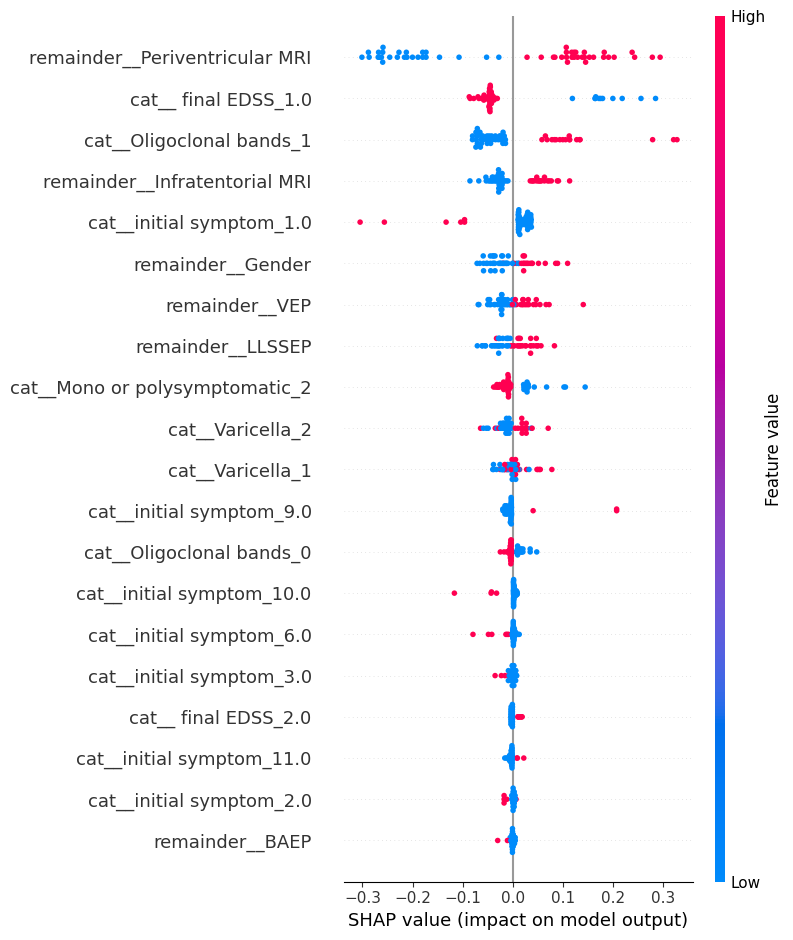

In [18]:

import shap
explainer = shap.TreeExplainer(opt)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[:, :, 1], x_test)


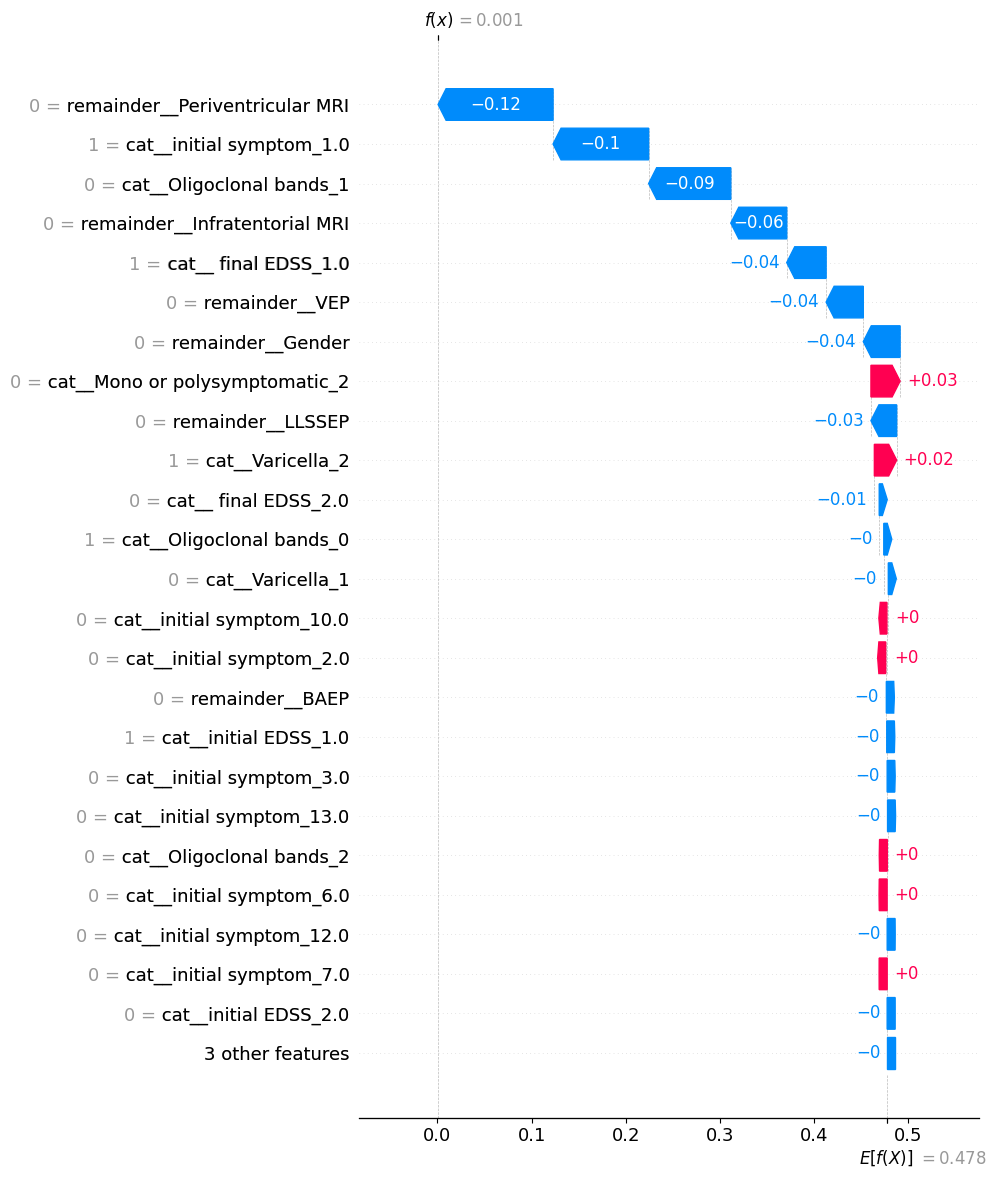

In [19]:
explainer=shap.Explainer(opt,x_train)
shap_values=explainer(x_test)
shap.plots.waterfall(shap_values[0,:, 1],max_display=25)

In [20]:
! pip install pdpbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.5 MB/s eta 0:00:00


In [21]:
# import matplotlib.pyplot as plt
# from sklearn.inspection import PartialDependenceDisplay

# # ----------------------------
# # Features to analyze
# # ----------------------------
# pdp_features = [
#     'cat__Varicella_1', 'cat__Varicella_2',
#        'cat__Mono or polysymptomatic_2', 'cat__Oligoclonal bands_0',
#        'cat__Oligoclonal bands_1', 'cat__Oligoclonal bands_2',
#        'cat__initial EDSS_1.0', 'cat__initial EDSS_2.0',
#        'cat__initial symptom_1.0', 'cat__initial symptom_2.0',
#        'cat__initial symptom_3.0', 'cat__initial symptom_6.0',
#        'cat__initial symptom_7.0', 'cat__initial symptom_9.0',
#        'cat__initial symptom_10.0', 'cat__initial symptom_11.0',
#        'cat__initial symptom_12.0', 'cat__initial symptom_13.0',
#        'cat__initial symptom_nan', 'cat__ final EDSS_1.0',
#        'cat__ final EDSS_2.0', 'remainder__Gender', 'remainder__LLSSEP',
#        'remainder__VEP', 'remainder__BAEP', 'remainder__Periventricular MRI',
#        'remainder__Infratentorial MRI'
# ]

# # ----------------------------
# # Generate PDP plots (AVERAGE ONLY)
# # ----------------------------
# fig, ax = plt.subplots(
#     nrows=1,
#     ncols=len(pdp_features),
#     figsize=(18, 5)
# )

# PartialDependenceDisplay.from_estimator(
#     opt,
#     x_train_res,
#     features=pdp_features,
#     kind="average",
#     grid_resolution=50,
#     ax=ax,
#     response_method="decision_function" # Added this line
#                           # Added this line
# )

# plt.tight_layout()
# plt.show()

In [22]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f97e6bb5bf720562d38f1ac8493eb136718def5267956d29f189a6f1f7a9268e
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [23]:
# from lime import lime_tabular
# features = x_train.columns.tolist()

# explainer_lime = lime_tabular.LimeTabularExplainer(x_train_res.values,
#                                                    feature_names=features,
#                                                    verbose=True,
#                                                    mode='classification')

In [24]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_res.values, feature_names=x_train.columns.tolist(), class_names=[0, 1], discretize_continuous=True)

In [25]:
i = np.random.randint(0, x_test.shape[0])
exp = explainer.explain_instance(x_test.iloc[i].values, opt.predict_proba, num_features=5, top_labels=1)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
exp.show_in_notebook(show_table=True, show_all=False)

In [27]:
!pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.5 MB/s eta 0:00:00


In [28]:
import dice_ml
x_df=pd.DataFrame(x_train_res,columns=opt.feature_names_in_)
y_df=pd.DataFrame({'target': y_train_res})

dice_data=dice_ml.Data(dataframe=pd.concat([x_df,y_df],axis=1),
                       outcome_name="target",
                       continuous_features=[])
dice_model = dice_ml.Model(
    model=opt,
    backend="sklearn",
    model_type="classifier"
)


In [29]:
import dice_ml
exp = dice_ml.Dice(dice_data, dice_model)

In [30]:
query_instance = x_df.iloc[[0]]

cf = exp.generate_counterfactuals(
    query_instance,
    total_CFs=3,
    desired_class="opposite"
)

cf.visualize_as_dataframe()


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.12/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.12/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecat

Query instance (original outcome : 0)


,cat__Varicella_1,cat__Varicella_2,cat__Mono or polysymptomatic_2,cat__Oligoclonal bands_0,cat__Oligoclonal bands_1,cat__Oligoclonal bands_2,cat__initial EDSS_1.0,cat__initial EDSS_2.0,cat__initial symptom_1.0,cat__initial symptom_2.0,...,cat__initial symptom_nan,cat__ final EDSS_1.0,cat__ final EDSS_2.0,remainder__Gender,remainder__LLSSEP,remainder__VEP,remainder__BAEP,remainder__Periventricular MRI,remainder__Infratentorial MRI,target
0,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0



Diverse Counterfactual set (new outcome: 1)


,cat__Varicella_1,cat__Varicella_2,cat__Mono or polysymptomatic_2,cat__Oligoclonal bands_0,cat__Oligoclonal bands_1,cat__Oligoclonal bands_2,cat__initial EDSS_1.0,cat__initial EDSS_2.0,cat__initial symptom_1.0,cat__initial symptom_2.0,...,cat__initial symptom_nan,cat__ final EDSS_1.0,cat__ final EDSS_2.0,remainder__Gender,remainder__LLSSEP,remainder__VEP,remainder__BAEP,remainder__Periventricular MRI,remainder__Infratentorial MRI,target
0,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,0,1,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [31]:
# !pip install --upgrade numpy
# !pip install --force-reinstall --no-cache-dir alibi
# !pip install --upgrade scikit-learn pandas numba


In [32]:
# !pip install alibi

# def predict_fn(Z):
#     return opt.predict(Z)

# from alibi.explainers import AnchorTabular

# feature_names = opt.feature_names_in_

# explainer = AnchorTabular(
#     predictor=predict_fn,
#     feature_names=feature_names
# )

# explainer.fit(x_train_res)

# idx = 0  # patient index
# explanation = explainer.explain(
#     x_train_res[idx],
#     threshold=0.95
# )

# print("Anchor rules:")
# print(explanation.anchor)

# print("\nPrecision:", explanation.precision)
# print("Coverage:", explanation.coverage)


In [33]:
! pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti
instance = x_test.iloc[[0]]

prediction, bias, contributions = ti.predict(
    opt,
    instance
)

print("Prediction:", prediction)
print("Bias:", bias)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

Prediction: [[9.99333333e-01 6.66666667e-04]]
Bias: [[0.49767806 0.50232194]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

In [34]:
print("Prediction:", prediction)
print("Bias:", bias)

Prediction: [[9.99333333e-01 6.66666667e-04]]
Bias: [[0.49767806 0.50232194]]


In [35]:
contrib_df = pd.DataFrame({
    "Feature": x_test.columns,
    "Contribution": contributions[0, :, 1]
}).sort_values(by="Contribution", ascending=False)

print(contrib_df)

                           Feature  Contribution
1                 cat__Varicella_2      0.042010
0                 cat__Varicella_1      0.001091
9         cat__initial symptom_2.0      0.000093
7            cat__initial EDSS_2.0      0.000000
6            cat__initial EDSS_1.0      0.000000
5         cat__Oligoclonal bands_2      0.000000
17       cat__initial symptom_13.0      0.000000
15       cat__initial symptom_11.0      0.000000
16       cat__initial symptom_12.0      0.000000
14       cat__initial symptom_10.0      0.000000
12        cat__initial symptom_7.0      0.000000
18        cat__initial symptom_nan      0.000000
11        cat__initial symptom_6.0     -0.000185
10        cat__initial symptom_3.0     -0.001301
24                 remainder__BAEP     -0.001928
3         cat__Oligoclonal bands_0     -0.002378
8         cat__initial symptom_1.0     -0.004020
20            cat__ final EDSS_2.0     -0.004240
2   cat__Mono or polysymptomatic_2     -0.007711
22               rem

In [36]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00


In [37]:
!pip install pytorch-tabnet
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier
clf = TabNetMultiTaskClassifier()
clf.fit(
  x_train_res.values, y_train_res.values.reshape(-1, 1)

)
y_pred = clf.predict(x_test.values)[0].astype(int)
y_prob = clf.predict_proba(x_test.values)[0][:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("PR AUC (average precision):", average_precision_score(y_test, y_prob))

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
e

In [38]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

model = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2)
)

model.fit(
    x_train_res.values, y_train_res.values,

    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10
)

epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
e

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


In [39]:
y_pred_tabnet = model.predict(x_test.values)
y_prob_tabnet = model.predict_proba(x_test.values)[:, 1]

print("Accuracy (TabNetClassifier):", accuracy_score(y_test, y_pred_tabnet))
print(classification_report(y_test, y_pred_tabnet))
print("Confusion matrix (TabNetClassifier):\n", confusion_matrix(y_test, y_pred_tabnet))
print("ROC AUC (TabNetClassifier):", roc_auc_score(y_test, y_prob_tabnet))
print("PR AUC (TabNetClassifier):", average_precision_score(y_test, y_prob_tabnet))

Accuracy (TabNetClassifier): 0.5818181818181818
              precision    recall  f1-score   support

           0       0.59      0.80      0.68        30
           1       0.57      0.32      0.41        25

    accuracy                           0.58        55
   macro avg       0.58      0.56      0.54        55
weighted avg       0.58      0.58      0.56        55

Confusion matrix (TabNetClassifier):
 [[24  6]
 [17  8]]
ROC AUC (TabNetClassifier): 0.45999999999999996
PR AUC (TabNetClassifier): 0.5437402315471109


In [40]:
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.0/554.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [41]:
from tabpfn import TabPFNClassifier

clf = TabPFNClassifier()  # Uses TabPFN 2.5 weights, finetuned on real data.
# To use TabPFN v2:
# clf = TabPFNClassifier.create_default_for_version(ModelVersion.V2)
clf.fit(x_train_res, y_train_res)
prediction_probabilities = clf.predict_proba(x_test)
print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(x_test)
print("Accuracy", accuracy_score(y_test, predictions))


RuntimeError: Authentication error downloading from 'Prior-Labs/tabpfn_2_5'.
This model is gated and requires you to accept its terms.

Please follow these steps:
1. Visit https://huggingface.co/Prior-Labs/tabpfn_2_5 in your browser and accept the terms of use.
2. Log in to your Hugging Face account via the command line by running:
   hf auth login
(Alternatively, you can set the HF_TOKEN environment variable with a read token).

For detailed instructions, see https://docs.priorlabs.ai/how-to-access-gated-models

In [ ]:
! pip install tab-transformer-pytorch

In [ ]:
import torch
from tab_transformer_pytorch import TabTransformer

categories = [x_train_res[col].nunique() for col in x_train_res.columns]

print(categories)


In [ ]:
!pip install tabtransformertf

In [ ]:
import torch

x_categ = torch.tensor(x_train_res.values, dtype=torch.long)
y = torch.tensor(y_train_res.values).float().view(-1, 1)

from tab_transformer_pytorch import TabTransformer

model = TabTransformer(
    categories=tuple(categories),   # 27 binary categorical columns
    num_continuous=0,
    dim=16,                  # smaller dim is enough for binary
    depth=3,
    heads=4,
    dim_out=1
)


In [ ]:
from tabtransformertf.models.fttransformer import FTTransformerEncoder, FTTransformer


ft_linear_encoder = FTTransformerEncoder(
    numerical_features=0,  # list of numeric features
    categorical_features=x_categ,  # list of numeric features
    # numerical_data=train_df[NUMERIC_FEATURES].values,
    # categorical_data=train_df[CATEGORICAL_FEATURES].values,
    y = None,
    numerical_embedding_type='linear',
    embedding_dim=32,
    depth=3,
    heads=6,
    attn_dropout=0.3,
    ff_dropout=0.3,
    explainable=True)



ft_model = FTTransformer(
    encoder=ft_linear_encoder,  # Encoder from above
    out_dim=1,  # Number of outputs in final layer
    out_activation='relu',  # Activation function for final layer
)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = x_train_res.columns.tolist()   # list of feature names

PartialDependenceDisplay.from_estimator(
    estimator=opt,            # trained model
    X=x_train_res,
    features=features,
    kind="average",            # PDP
    response_method="decision_function"
    # target=1                  # Not needed with 'decision_function' for binary classification
)

plt.show()

In [ ]:
# 1. Check classes
print(opt.classes_)

# 2. Check predict_proba shape
opt.predict_proba(x_train_res[:5]).shape


In [ ]:
x_train_res.columns

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features=['cat__Varicella_1', 'cat__Varicella_2',
       'cat__Mono or polysymptomatic_2', 'cat__Oligoclonal bands_0',
       'cat__Oligoclonal bands_1', 'cat__Oligoclonal bands_2',
       'cat__initial EDSS_1.0', 'cat__initial EDSS_2.0',
       'cat__initial symptom_1.0', 'cat__initial symptom_2.0',
       'cat__initial symptom_3.0', 'cat__initial symptom_6.0',
       'cat__initial symptom_7.0', 'cat__initial symptom_9.0',
       'cat__initial symptom_10.0', 'cat__initial symptom_11.0',
       'cat__initial symptom_12.0', 'cat__initial symptom_13.0',
       'cat__initial symptom_nan', 'cat__ final EDSS_1.0',
       'cat__ final EDSS_2.0', 'remainder__Gender', 'remainder__LLSSEP',
       'remainder__VEP', 'remainder__BAEP', 'remainder__Periventricular MRI',
       'remainder__Infratentorial MRI']
for feature in features:
    PartialDependenceDisplay.from_estimator(
        estimator=opt,
        X=x_train_res,
        features=[feature],   # MUST be a list with ONE feature
        kind="average",
        response_method="decision_function",
        target=1
    )
    plt.title(f"PDP for {feature}")
    plt.show()


In [43]:
x_train_res.dtypes

,0
cat__Varicella_1,int64
cat__Varicella_2,int64
cat__Mono or polysymptomatic_2,int64
cat__Oligoclonal bands_0,int64
cat__Oligoclonal bands_1,int64
cat__Oligoclonal bands_2,int64
cat__initial EDSS_1.0,int64
cat__initial EDSS_2.0,int64
cat__initial symptom_1.0,int64
cat__initial symptom_2.0,int64


In [44]:
x_train_res.nunique()


,0
cat__Varicella_1,2
cat__Varicella_2,2
cat__Mono or polysymptomatic_2,2
cat__Oligoclonal bands_0,2
cat__Oligoclonal bands_1,2
cat__Oligoclonal bands_2,2
cat__initial EDSS_1.0,2
cat__initial EDSS_2.0,2
cat__initial symptom_1.0,2
cat__initial symptom_2.0,2
